# Assignment - PART 2 due Jan 27 - Gradient Descent

The goal of this assignment is to write code that does gradient descent for linear regression. Here are the parts

- Q1 Warm Up
- Paste in your code from last time and rerun it to store the variables
- Q2 Write a function that does gradient descent
- Q3 Use linear regretion to predict Life Expectancy - new data set!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1 - Warm Up

- Write code that creates a 100 x 2 matrix filled with random floatsa between 0-100 and prints the last 10 rows
- Make a scatter plot of the data that you just created.
- Find the average values of each of the columns.
- Make a scatter plot of the data where you plot values of y<50 in red and y>=50 in blue

In [2]:
# Fill a 100 X 2 np.array with random numbers (floats) and print the last 10 rows

df = 100*np.random.random((100,2)) #multiple by 100 since np.random is between 0 and 1
print(df[90:100, :])

[[80.9134877  27.72464019]
 [42.87883513 61.78634701]
 [82.2766559  22.92766217]
 [55.11900879 76.06814603]
 [98.03811821  7.40799154]
 [56.23491235 94.41918279]
 [54.87777988 56.12244147]
 [47.06583333 51.15883639]
 [98.36467296  7.3247483 ]
 [23.49827105 27.94929651]]


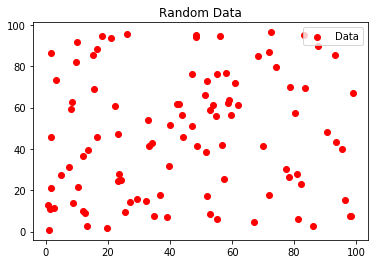

In [3]:
# Make a scatter plot of the random data where x is the first column and y is the second column of your random data

x = df[:,0] # first column
y = df[:,1] # second column

plt.figure()
plt.title('Random Data')
plt.scatter(x, y, label = 'Data', color = 'red')
plt.legend(loc = 'upper right')

In [4]:
# Find the average values of each of the columns in your random data
print('The average value of the first column is: \n', df[:,0].mean())
print('The average value of the second column is: \n', df[:,1].mean())

The average value of the first column is: 
 44.46910836770132
The average value of the second column is: 
 46.38598969789893


In [5]:
# Make a plot of your data such that if the y-value is less that 50 the color is red 
# and more than or equal to 50 the color is green


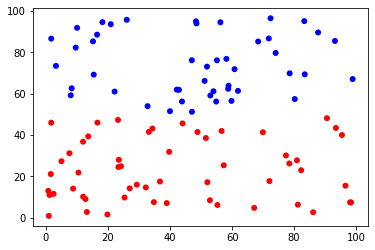

In [6]:
x = df[:,0]
y = df[:,1]

red_blue = np.where(y < 50,'r','b') # create conditions for the colors

plt.scatter(x, y, c=red_blue, linewidth=0)
plt.show()

## CODE FROM LAST TIME - copy and paste from last assignment (all code)

# Assignment due Jan 22 - Linear Regression

The goal of this assignment is to explore a data set and then preform linear regression on that data. Here are the parts

- Q1 Warm Up
- Q2 Import the Data (population vs. profit) and Create a Scatter Plot
- Q3 Find information about your data: Max of each feature, Min of each feature, number of samples. Then create two numpy column vectors. One that contains population the other profit.
- Q4 Write a function that calculates the mean squared error cost function
- Q5 Create a surface plot the graphs the cost function for a range of values
- Q6 Using the Normal Equation to minimize the cost function, find the line of best fit
- Q7 Make a plot that shows the original scatter plot of the data and the line that you just created
- Q8 Write a function that uses your linear regression formula to make predictions. Given the population of the city predict what the company profits are.

Data for this assignment originally comes from: https://www.coursera.org/learn/machine-learning


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1 - Warm Up

- Write code that creates a 5x5 identiy matrix using numpy and then changes the entries along the diagonal to be the numbers 1-5.
- Create a python function that reads in an existing dataframe, a name, birth month, and favorite animal and appends this to the existing dataframe.
- Use your function to create a dataframe that contains 5 entries

In [8]:
# Matrix with 1-5 along diagonal
mat = np.eye(5)
col = np.array([1,2,3,4,5]).T # take transpose to make it into a col
mat = mat*col
print(mat)

[[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 5.]]


In [9]:
# Function to append dataframe
mydata = pd.DataFrame([{'Name':'Joanna','Month':'Feb','Animal':'Otter'},{'Name':'Tamara','Month':'Nov','Animal':'Cat'}])
print(mydata.head())

def append_df(df, name, birth, animal):
    new_data = pd.Series({'Name': name,'Month': birth,'Animal': animal})
    df = df.append(new_data, ignore_index = True)
    return df


     Name Month Animal
0  Joanna   Feb  Otter
1  Tamara   Nov    Cat


In [10]:
# Use your function
## add three more entries for total of five
mydata = append_df(mydata,'Sam','June','Cat')
mydata = append_df(mydata,'Joey','March','Dog')
mydata = append_df(mydata,'Jeff','October','Spider')
mydata.head()

,Name,Month,Animal
0,Joanna,Feb,Otter
1,Tamara,Nov,Cat
2,Sam,June,Cat
3,Joey,March,Dog
4,Jeff,October,Spider


## Question 2 - Import and Explore the Data

The data for this assignment can be found at

URL = http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt

this data is in csv format. It contains data that matches the population of a city (units = tens of thousands) with the profit that a company makes (units = tens of thousands).

In [11]:
# Use Pandas to read in the data, label the first column "Population" and the second column "Profit"
# Display that first few rows of the data.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt'

df = pd.read_csv(URL, header = None) # use pandas to read the txt file as a csv from the url link
df.columns = ["Population","Profit"] # make df of the population and profit column
df.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


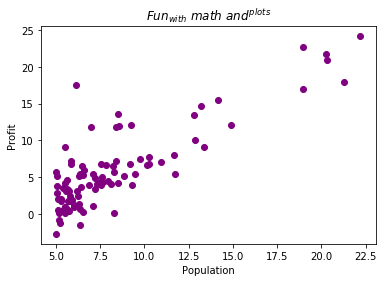

In [12]:
# Create a Scatter Plot with labeled axis that plots Population (x) vs Profit (y). Create a fun title for this plot.

x=df["Population"] # pull data from the "Population" column in the dataframe
y=df["Profit"] # pull data from the "Profit" column in the dataframe

plt.scatter(x,y, color = "purple")
plt.title("${Fun}_{with} \\ math \\ and^{plots}$")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

Does it appear at least plausable that this relationship can be described using linear regression (a straight line)?

It seems plausible that a straight line represents the relationship seen in the scatter plot.  Despite there being a clump around the lower y values, there some points at the upper right which makes it more likely.

In [13]:
# Prep your data for machine learning by creating two numpy column vectors
x = np.array(df["Population"]).reshape(-1,1)
y = np.array(df["Profit"]).reshape(-1,1)


In [14]:
# Append your x data to add a column of ones
col_of_ones = np.ones((len(x), 1)) # make a column of x that is length, m, with all 1's
x = np.hstack((col_of_ones, x)) # put the 1's vector to x's first column

In [15]:
# Check that the arrays are the correct shape
print("shape of x is: \n", x.shape)
print("shape of y is: \n", y.shape)

shape of x is: 
 (97, 2)
shape of y is: 
 (97, 1)


## Question 3 - Cost Function

Create a python function that reads in the vectors x and y, some parameter values theta, and the number of samples. It should return the value of the mean squared error cost function.

Test your code using our data a initial guess theta=[0,0]

NOTE: You should get The cost function value: 32.072733877455676


In [16]:
# Compute_Cost function here

def Compute_Cost(x, y, theta, m):
    h = np.matmul(theta.T,x.T) 
    val1 = np.square((h.T - y)) # Returns the element-wise square of h.T - y
    val2 = np.sum(val1)
    J = 1 / (2 * m) * val2 # combine operations into J
    return J


In [17]:
# Test your cost function here
theta = np.zeros((2, 1))
m = len(x)

J = Compute_Cost(x, y, theta, m)
print(J)

32.072733877455676


In the test of your cost function above you assumed that (theta1,theta2) = (0,0). What line does this represent in your scatter plot of the data? Would (theta1,theta2) = (0,0) give a very good prediction?



We assumed that (theta1, theta2) = (0,0) which represents the starting point of the gradient that we're plotting.  By picking different points it takes our program longer to find the starting point of the plot.  It seemed like (theta1, theta2) = (0,0) because the plot makes sense and the output is relatively quick so it appeared to be a good starting point.

## Question 4 - Plot the Cost Function

Here are some hints:

- create two np.arrays that contain a range of theta values
-- theta1 = [-10,10] with about 50 data points
-- theta2 = [-1, 4] with about 50 data points

- run these arrays through your python cost function to generate J values

- now you have (theta1,theta2,J) points. Use these points in plot_surface to get a nice looking curve.

In [18]:
# Code to generate J values
# HINT: use np.arange

a = 50 #50 points?
theta0 = np.arange(-10, 10, 20 / a) #start at -10 to 10, increments of 20
theta1 = np.arange(-1, 4, 5 / a) # start at -1 to 4, increments of 5

# initialize cost function values
J = np.zeros((a, a))
# calculate cost function for each theta value
for i in range(0, a):
    for j in range(0, a):
        theta[0, 0] = theta0[i]
        theta[1, 0] = theta1[j]
        J[i, j] = Compute_Cost(x, y, theta, m)

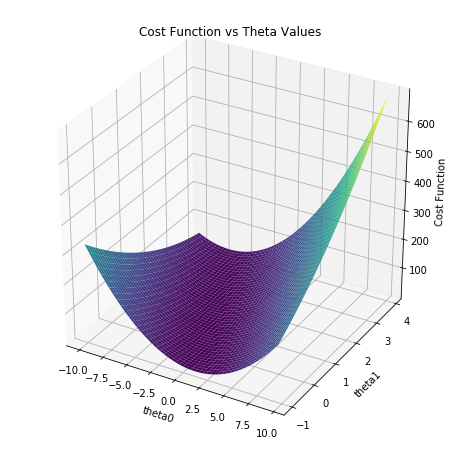

In [19]:
# Code to create a surface plot
from mpl_toolkits import mplot3d

# Plot theta0, theta1, cost
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection = "3d")

theta0, theta1 = np.meshgrid(theta0, theta1)  # make the grid

p = ax.plot_surface(theta0, theta1, J, cmap='viridis', edgecolor='none')

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost Function')
plt.title("Cost Function vs Theta Values")

plt.savefig('plot3.png', format='png')  # save file as plot3.png
plt.show()

Does the surface plot appear to have a clear global minimum?

There appears to be a global minimum where the shade of purple is darkest. This is approximately around theta0 = 1 and theta1 = -.5

## Question 5 - The Normal Equation

Use the Normal Equation developed in class to minimize the cost function. This should result in a theta1 and theta2 that can generate the line of best fit.

In [20]:
# Normal Equation Calculation
val1 = np.linalg.inv(np.matmul(x.T, x))
val2 = np.matmul(val1, x.T)
theta_normal = np.matmul(val2, y)

print(theta_normal)

[[-3.89578088]
 [ 1.19303364]]


## Question 6 - Create a Plot of the Data and the Linear Regression Line

Make a plot that shows the original scatter plot data, with nice lables, and then overlays the liner function that best fits the data.

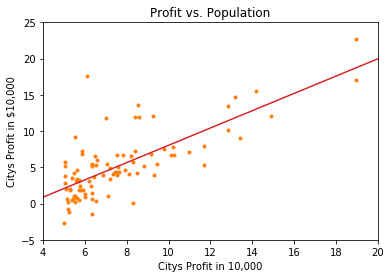

In [21]:
# Make plot
def plotLinearFit(x_stuff, theta, x, y):
    pred = np.matmul(x_stuff, theta)  # predicted y value
    plt.figure()
    plt.title('Profit vs. Population')
    plt.xlabel('Citys Profit in 10,000')
    plt.ylabel('Citys Profit in $10,000')
    plt.ylim((-5, 25))
    plt.xlim((4, 20))
    plt.plot(x, y, marker='.', linestyle = "")  # plot of data remove lines between points
    plt.plot(x_stuff, pred, linestyle = "-")  #linear fit
    plt.show()
    
# superimpose best fit
a = 10
x_stuff = np.array([np.linspace(0, 25, a)]).T
x_one = np.ones((a, 1))
x_stuff = np.hstack((x_one, x_stuff))
plotLinearFit(x_stuff, theta_normal, x, y)



How did you do? Does the line seem to match the data well?

Initially the data didn't fit well because I did not have any limits on the x and y axis, but once I narrowed down the axes limits the data fitted better.  Overall, the line seems to match the data well.

## Question 7 - Use your ML Algorithm to Make Predictions

Now write a function that takes as an input the (theta1, theta2) values and the Popation and outputs a prediction for what the profit will be.

Test your code for the following values:

Population = 3.5

Population = 7

In [22]:
# Function that takes population as an input and predicts profit

In [23]:
# Test the function
input1 = np.array([1, 3.5])
sol1 = np.matmul(input1, theta)
print("Prediction if x = 3.5: \n", sol1)
input2 = np.array([1, 7])
sol2 = np.matmul(input2, theta)
print("Prediction if x = 7: \n", sol2)

Prediction if x = 3.5: 
 [23.25]
Prediction if x = 7: 
 [36.9]


## Question 2 - Gradient Descent

 - Write a python function that implements the gradient descent algorithm for the data set above.
 - Use your function to find the theta values that minimize the cost: You can initialize with theta = [0,0], 1500 iterations, and alpha = 0.01

NOTE - if you are thinking ahead you might try to make this algorithm completely generally so that it works even if you have more or fewer features in your data set.

In [24]:
# Your gradient descent function here:

# my compute_cost function here for reference, but probably dont need

'''
def Compute_Cost(x, y, theta, m):
    h = np.matmul(theta.T,x.T)
    val1 = np.square((h.T - y))
    val2 = np.sum(val1)
    J = 1 / (2 * m) * val2
    return J

'''
def gradientDescent(x, y, theta, alpha, iterations, m):
    """
    This function reads in:
        the feature matrix X 
        the y values - target
        the initial theta values (guess)
        the step size parameter alpha
        the number of iterations you want to run
        and the number of data points or observations in your training data
    """
    # your code here
    Jnew = np.zeros(iterations)    
    for i in range(iterations):
        pred = np.dot(x, theta)
        theta = theta - (1/m)*alpha*(x.T.dot((pred - y)))
        Jnew[i] = Compute_Cost(x, y, theta, m)
    
    return theta, Jnew

# gradient descent parameters:
    # I suggest you use:
        # theta = np.zeros((2, 1))
        # iterations = 1500
        # alpha = 0.01

# gradient descent results
#theta = gradientDescent(x, y, theta, alpha, iterations, m)
m = len(x)
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01
theta, Jnew = gradientDescent(x, y, theta, alpha, iterations, m)


print("Final Theta values")
print(theta)

Final Theta values
[[-3.63029144]
 [ 1.16636235]]


How did your gradient descent do compared with the Normal Equation? They should be pretty close. If you do more itterations it will get closer.

The values recieved from the final theta values are [[-3.63029144][1.16636235]] which is very close what we recieved from the normal, [[-3.89578088][ 1.19303364]].

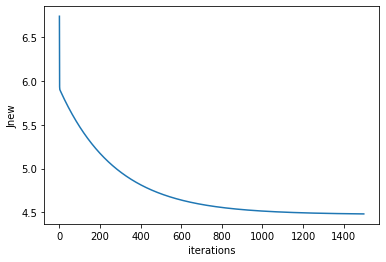

In [25]:
# plot the iterations and cost function

plt.figure()
plt.plot(range(1500), Jnew)
plt.xlabel("iterations")
plt.ylabel("Jnew")
plt.show()

## Question 3 - Full Linear Regression Analysis

Complete a full linear regression analysis on the data set imported below. You should:

- import and explore the data - see information below about the seaborn package
- reduce the number of features to just the most important ones 
- do a linear regression with your gradient descent algorithm on the data to predict the life expectancy as a function of features.

- use your regression variables to predict the life expectancy for a new variable

NOTE: We are still skipping an important idea of validation or crossvalidation. At this point in class we are just assuming that the training went well and we are using the algorithm. NEVER do this in the real world!!!

In [26]:
# Import the data
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/LifeExpectancyData.csv'

df = pd.read_csv(URL)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### About the Data

From: https://www.kaggle.com/kumarajarshi/life-expectancy-who/data

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors. 

### Columns:

Country

Year

Status

Developed or Developing status

Life expectancy
Life Expectancy in age

Adult Mortality
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

Infant deaths
Number of Infant Deaths per 1000 population

Alcohol
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

Percentage expenditure
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles
Measles - number of reported cases per 1000 population

BMI
Average Body Mass Index of entire population

Under-five deaths
Number of under-five deaths per 1000 population

Polio
Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure
General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS
Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP
Gross Domestic Product per capita (in USD)

Population
Population of the country

Thinness 1-19 years
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Thinness 5-9 years
Prevalence of thinness among children for Age 5 to 9(%)

Income composition of resources
Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling
Number of years of Schooling(years) 

In [27]:
# Use pandas to explore (describe) the stats of the data: max, min, mean, std, quarties
df.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Seaborn is a python package for data visualization. Below are a few fun commands.

documentation: https://seaborn.pydata.org/

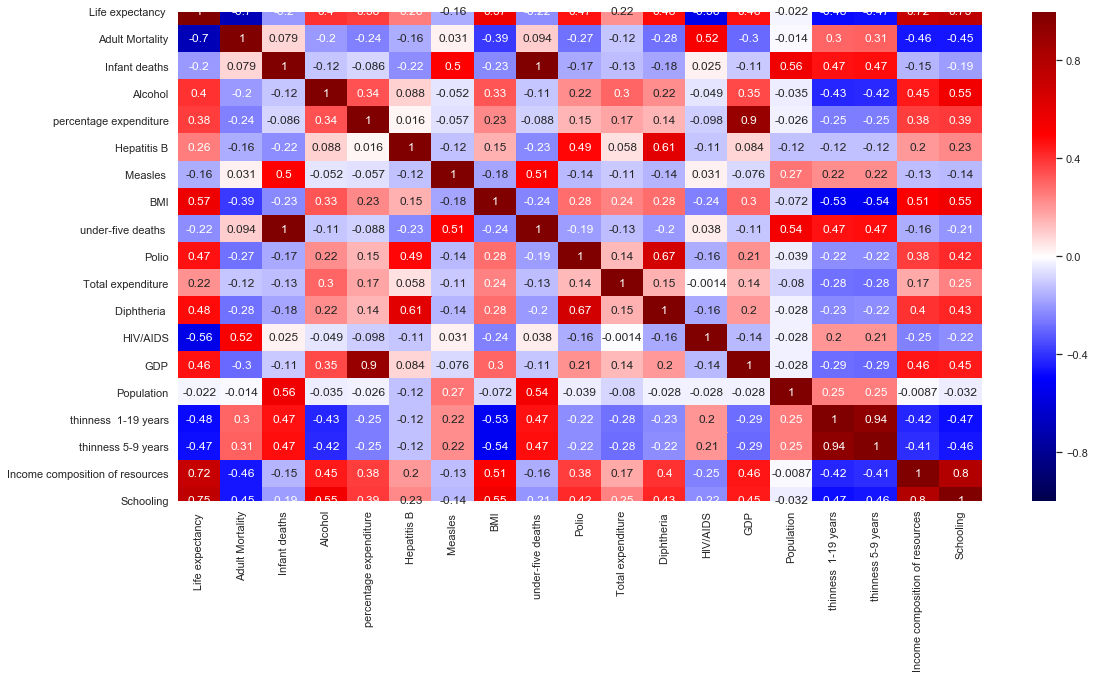

In [28]:
# You should be able to just run this cell!! Assumes df contains the full data set

import seaborn as sns

# Delete the columns in the data frame that contain strings
df.drop('Country', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)
df.drop('Status', axis=1, inplace=True)

# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(18,9)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# This should plot a heat map of correlation constants. The larger the magnitude the bigger the correlation.

In [29]:
# You should just be able to run this cell!!

# Delete all rows that contain NaN or not numbers
df.dropna(inplace=True)

# Plot all of the variable-to-variable relations as scatterplots
#sns.pairplot(df,height=2.5)

# This should plot a different scatter plot for each pair of variables

##### At this point you should be looking at the correlation and pairwise plots and looking for things like highly correlated features, features corelated with your target output, outliers, etc. You are trying to think about selecting which features are most important, which features are most important. This is a bit overwhelming, but part of the job.

In [30]:
# Now it's your turn!!!

# Create a new data frame from the old that keeps just 3-5 "important features" YOUR CHOICE!
# Good features for linear regression would be ones that are highly correlated (positive or negative) 
# to your target output and seem to have a linear scatter plot when graphed against your target output.
# in our case the target output is Life Expectancy!

# This is more of an art than a science! If you are really intersted in a more solid foundataion for this 
# TAKE MORE STATISTICS

df_train = df[['Alcohol', 'Schooling', 'Income composition of resources', 'Life expectancy ']].copy()
print("the shape of df_new is: \n", df_train.shape)
df_train.head()
#print(df_new.iloc[:,0])

the shape of df_new is: 
 (1649, 4)


,Alcohol,Schooling,Income composition of resources,Life expectancy
0,0.01,10.1,0.479,65.0
1,0.01,10.0,0.476,59.9
2,0.01,9.9,0.470,59.9
3,0.01,9.8,0.463,59.5
4,0.01,9.5,0.454,59.2


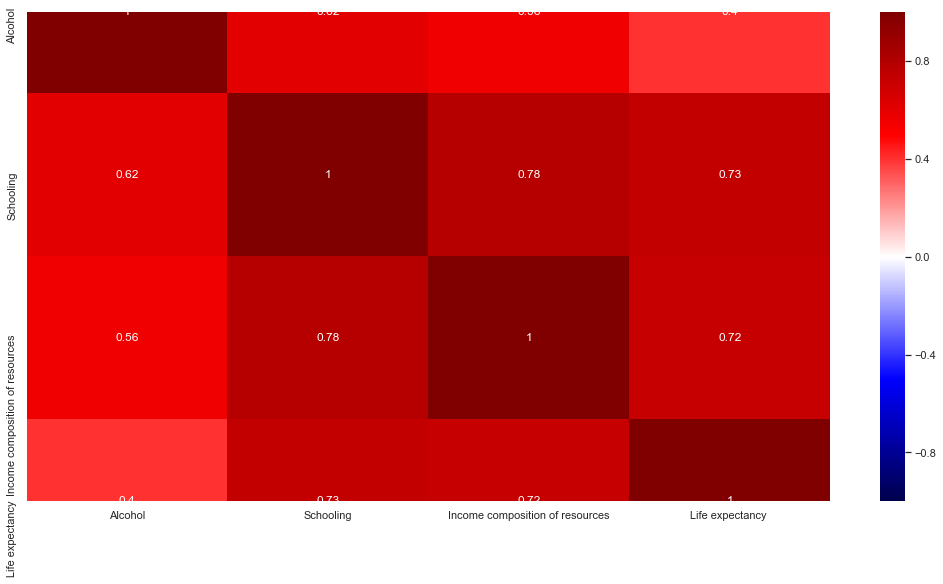

In [31]:
# Visualize the correlation with Seaborn for your reduced number of features data set
# it helps to make the figure size bigger

# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(18,9)})
sns.heatmap(df_train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)


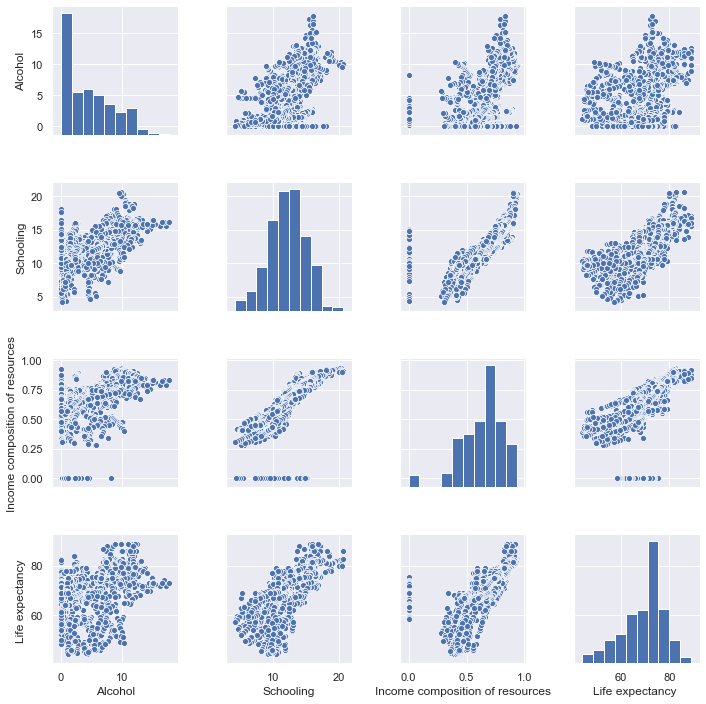

In [32]:
# Plot all of the variable-to-variable relations as scatterplots for your reduced data set

# Delete all rows that contain NaN or not numbers
df.dropna(inplace=True)

# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df_train,height=2.5)

In [33]:
# In this case we need to normalize our features. 
# This means, use "some method" to scale all the features so their magnitudes are closer to the range [-1,1]

# create scale factors for Alcohol variable
f1 = df_train.iloc[:,0].values.reshape(-1,1)
fmean1 = np.mean(f1,axis=0)
fstd1 = np.std(f1,axis=0)

fscale1 = (f1-fmean1)/(fstd1)

# create scale factors for Schooling variable
f2 = df_train.iloc[:,1].values.reshape(-1,1)
fmean2 = np.mean(f2,axis=0)
fstd2 = np.std(f2,axis=0)

fscale2 = (f2-fmean2)/(fstd2)

# create scale factors for Income composition of resources
f3 = df_train.iloc[:,2].values.reshape(-1,1)
fmean3 = np.mean(f3,axis=0)
fstd3 = np.std(f3,axis=0)

fscale3 = (f3-fmean3)/(fstd3)

# create scale factors for life expectancy, DONT REALLY NEED TO DO THIS
y = df_train.iloc[:,3].values.reshape(-1,1)
f4 = df_train.iloc[:,3].values.reshape(-1,1)
fmean4 = np.mean(f4,axis=0)
fstd4 = np.std(f4,axis=0)
fscale4 = (f4-fmean4)/(fstd4)

print(y.shape)
# create ones column
ones = np.ones_like(f1).reshape(-1,1)
X = np.hstack((ones, fscale1, fscale2, fscale3))
print("The shape of the normalized df is: \n", X.shape)
print(X[:5])
# This is not unique, there are lots of ways to do this - you can choose your own method


# Find the scaling values for each column
# Always save your scaling parameters - you will need them when you use your model!!!
# Then scale/normalize the data


(1649, 1)
The shape of the normalized df is: 
 (1649, 4)
[[ 1.         -1.12294757 -0.72279909 -0.83346213]
 [ 1.         -1.12294757 -0.75858316 -0.8498526 ]
 [ 1.         -1.12294757 -0.79436723 -0.88263354]
 [ 1.         -1.12294757 -0.8301513  -0.92087796]
 [ 1.         -1.12294757 -0.9375035  -0.97004937]]


In [34]:
# Create numpy arrays for your features X and your targets y
# Don't forget that first column of ones!
# Always check the shape of your data!

# UNNECCESARY TO DO IF PREVIOUS MATRIX IS ALREADY NUMPY ARRAY

x1 = np.array(X[:,0]) # first column is 1's
x2 = np.array(X[:,1]) # alcohol
x3 = np.array(X[:,2]) # schooling
x4 = np.array(X[:,3]) # income
#y = np.array(fscale4) # life expectancy
print(fscale4)
print(x1.shape, x2.shape, x3.shape, x4.shape, y.shape)

[[-0.48922254]
 [-1.06915243]
 [-1.06915243]
 ...
 [-2.78619977]
 [-2.7293439 ]
 [-2.64974568]]
(1649,) (1649,) (1649,) (1649,) (1649, 1)


In [35]:
# Use gradient descent to find theta values
# Gradient descent parameters:

theta = np.zeros((4, 1))
iterations = 1500
alpha = 0.01
x = X
m = len(x)

# Do gradient descent to find theta - you should be able to use your gradient descent function
theta, Jnew = gradientDescent(x, y, theta, alpha, iterations, m)
print("Final Theta values")
print(theta)
THETA_FINAL = theta
# Sanity check - What shape should theta be???
        ## there should be four thetas

Final Theta values
[[69.30228477]
 [-1.1038424 ]
 [ 4.18616521]
 [ 3.67990247]]


### Now import the test data and make predictions - see how well you did using your cost function
 
 NOTE - you can compare your results with your friends - Smaller Cost Fuction WINS!!!

In [36]:
# This is a random subset of the data that was used in training.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/LifeExpectancyData_TestingData.csv'

df_test = pd.read_csv(URL)
df_test.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Zambia,2006,Developing,58.0,526,33,2.25,1.860004,81.0,459,...,83,6.11,81,15.9,13.154199,12383446.0,7.0,6.9,0.479,10.9
1,Saint Vincent and the Grenadines,2001,Developing,79.0,186,0,4.73,0.000000,NaN,0,...,99,3.64,99,0.7,NaN,NaN,3.9,3.9,0.673,12.8
2,Sudan,2015,Developing,64.1,225,58,NaN,0.000000,93.0,3585,...,93,NaN,93,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
3,Kiribati,2008,Developing,65.1,21,0,0.46,167.620155,83.0,0,...,74,12.23,82,0.1,1413.323400,9844.0,0.2,0.1,0.572,11.6
4,Samoa,2000,Developing,72.0,18,0,3.00,21.254300,89.0,0,...,94,5.31,95,0.1,154.689230,17461.0,0.2,0.2,0.640,12.1


In [37]:
# Select just the features you used and the target output in x and y
df_tests = df_test[['Alcohol', 'Schooling', 'Income composition of resources', 'Life expectancy ']].copy()
df_tests.head()

# Delete all rows that contain NaN or not numbers
df_tests.dropna(inplace=True)

# Normalize the test data the same way you did above - use the same scale parameters
# Then scale/normalize the data
# create scale factors for Alcohol variable

f1a = df_tests.iloc[:,0].values.reshape(-1,1)
fscale1a = (f1a-fmean1)/(fstd1)

# create scale factors for Schooling variable
f2a = df_tests.iloc[:,1].values.reshape(-1,1)
fscale2a = (f2a-fmean2)/(fstd2)

# create scale factors for Income composition of resources
f3a = df_tests.iloc[:,2].values.reshape(-1,1)
fscale3a = (f3a-fmean3)/(fstd3)

# create vector for life expectancy, dont really need
y_test = df_tests.iloc[:,3].values.reshape(-1,1)


# Create your xtest matrix and ytest vector
ones = np.ones_like(f1a).reshape(-1,1)
X_tests_scale = np.hstack((ones, fscale1a, fscale2a, fscale3a))
print("The shape of the normalized df is: \n", X_tests_scale.shape)
print(X_tests_scale[:5])


The shape of the normalized df is: 
 (26, 4)
[[ 1.         -0.56683578 -0.43652656 -0.83346213]
 [ 1.          0.04885942  0.24337072  0.22645485]
 [ 1.         -1.01122868 -0.18603809 -0.3253576 ]
 [ 1.         -0.38063764 -0.00711775  0.04615969]
 [ 1.         -0.87716602 -0.86593536 -1.1121001 ]]


In [38]:
# Calculate the cost function using the test values
# You already wrote this function in PART1

x = X_tests_scale
theta = THETA_FINAL
m = len(x)
y = y_test

J = Compute_Cost(x, y, theta, m)
print(J)

18.523443288255134


In [39]:
# Write a function that will make predictions for you
def predict_GDP(x, theta):
    # Your code here    
    return np.matmul(x, theta) # return the prediction

ypred = predict_GDP(X_tests_scale, THETA_FINAL)
print(ypred)

[[65.0335505 ]
 [71.10047347]
 [68.44245146]
 [69.86251582]
 [62.55316942]
 [54.48421631]
 [70.82960924]
 [77.09168068]
 [48.592699  ]
 [74.88995102]
 [71.94806528]
 [58.88953449]
 [67.08428058]
 [70.24182798]
 [74.18307068]
 [72.60390592]
 [69.16607614]
 [61.36883143]
 [62.87415135]
 [77.46847151]
 [74.74687736]
 [79.89852766]
 [61.01783506]
 [58.609725  ]
 [75.81898147]
 [66.98532437]]


In [40]:
# Print the actual predicted values (not the scaled ones)
# HINT - multiply by the yscale you used above

## DONT NEED TO DO SINCE I DIDNT SCALE Y

In [41]:
# Print the difference between your predictions and the real values
diff = ypred - y_test
print(diff)

[[  7.0335505 ]
 [ -7.89952653]
 [  3.34245146]
 [ -2.13748418]
 [  7.85316942]
 [-14.51578369]
 [ -4.57039076]
 [  0.59168068]
 [  0.892699  ]
 [  2.48995102]
 [ -2.75193472]
 [  0.28953449]
 [ -5.91571942]
 [  1.74182798]
 [  0.78307068]
 [ -0.89609408]
 [ -4.13392386]
 [  6.56883143]
 [ -1.82584865]
 [  0.66847151]
 [ -0.25312264]
 [ -5.10147234]
 [ -3.18216494]
 [ -4.290275  ]
 [ -1.08101853]
 [ 19.18532437]]


### How did you do? Who got the smallest cost value on their test data? What did you change or play around with to reduce the cost? Which predictions were the worst?

My function did not do that great in some instances like the 6th or last country but in other cases it did fairly decent.  THings that I could do to improve it would increase the number of iterations. 